In [1]:
import json
import pandas as pd
import os
import json5
from graph_construction.qp.visitor.DefaultVisitor import DefaultVisitor
from graph_construction.qp.visitor.AbstractVisitor import dispatch

In [2]:
from inductive_query.utils import *

In [3]:
# PP dataset
path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss'
path = '/data/wikidata_0_1_10_v3_path_weight_loss'
# baseline datasets
path = '/data/DBpedia2016_0_1_10_weight_loss'
path = '/data/wikidata_0_1_10_v2_weight_loss'
ext = UnseenQueryExtractor(path)
ext.set_train_pred_ents()
ext.set_train_pred_queryIDs()
ext.set_train_ent_queryIDs()
ext.set_test_pred_ents()
ext.set_test_pred_queryIDs()
ext.set_test_ent_queryIDs()
print(len(ext.get_unseen_ent_queryIds()))
print(len(ext.get_unseen_pred_queryIds()))

1210
203


In [33]:
#len([x for x in ext.test_preds.keys() if x not in ext.train_preds.keys()])/len(list(ext.test_preds.keys()))

In [ ]:
"Ent: %.2f  Pred: %.2f" % ext.get_fraction_unseen()

In [35]:
#[x for x in ext.train_ent_queryIDs]

In [36]:
#ext.train_preds

In [37]:
#import pathlib
#pred_queries = set()
#for x in ext.train_preds.keys():
#    for y in ext.train_preds[x]:
#        pred_queries.add( pathlib.Path(y).name)
#len(pred_queries)

In [38]:
#pred_queries

In [39]:
'http://lsq.aksw.org/lsqQuery-SI2iSCj06FMKpW05Todf4tB48lVF4zKl0M2_4wVhbM8'[20:]

'lsqQuery-SI2iSCj06FMKpW05Todf4tB48lVF4zKl0M2_4wVhbM8'

In [40]:

from inductive_query.result_processor import *

p = ResultProcessor('/data/DBpedia2016_0_1_10_weight_loss/planrgcn_binner_litplan/test_pred.csv')
print(len(p.df))
p.retain_path('/data/DBpedia2016_0_1_10_weight_loss/test_sampled.tsv')
print(len(p.df))


print(p.confusion_matrix_to_latex_row_wise())
p.class_wise_metrics_for_table()

2929
2926
\begin{tabular}{lrrr}
\toprule
Predicted & 0 & 1 & 2 \\
Actual &  &  &  \\
\midrule
0 & 95.56 & 2.13 & 2.31 \\
1 & 6.79 & 88.82 & 4.39 \\
2 & 2.17 & 29.85 & 67.98 \\
\bottomrule
\end{tabular}



({'0s-1s': '0.96/0.97/0.96',
  '1s-10s': '0.74/0.63/0.89',
  '10s-∞': '0.77/0.89/0.68'},
 ['F1', 'Precision', 'Recall'])

In [5]:
import pathlib
path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss'
prediction_path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
ext = UnseenQueryExtractor(path)
ext.set_train_pred_ents()
ext.set_train_pred_queryIDs()
ext.set_train_ent_queryIDs()
ext.set_test_pred_ents()
ext.set_test_pred_queryIDs()
ext.set_test_ent_queryIDs()
unseen_ent_queryID = [pathlib.Path(x).name for x in ext.get_unseen_ent_queryIds()]
unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_unseen_pred_queryIds()] 
p = ResultProcessor(prediction_path)
p.retain_path(split_path)
p.retain_ids(unseen_pred_queryID)
print("unseen entity")
print(p.confusion_matrix_to_latex_row_wise(name_dict=name_dict))
print("unseen predicate")
p = ResultProcessor(prediction_path)
p.retain_path(split_path)
p.retain_ids(unseen_ent_queryID)
print(p.confusion_matrix_to_latex_row_wise(name_dict=name_dict))


FileNotFoundError: [Errno 2] No such file or directory: '/data/DBpedia2016_0_1_10_path_v3_weight_loss/train_sampled.tsv'

In [11]:

from inductive_query.res_proc_helper import *
import importlib
import inductive_query.utils as ih
importlib.reload(ih)
CompletelyUnseenQueryExtractor = ih.CompletelyUnseenQueryExtractor

path = '/data/wikidata_0_1_10_v3_path_weight_loss'
pred_path = '/data/wikidata_0_1_10_v3_path_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
c = CompletelyUnseenQueryExtractor(path)
q_files = c.run()
#wikidata_Unseen = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN Wikidata PP")
#p_all = get_unseen_result_processor(path, pred_path, split_path, "",name_dict, "PlanRGCN Unseen All")
#p_p = get_unseen_result_processor(path, pred_path, split_path, "pred",name_dict, "PlanRGCN Unseen Predicate")
#p_e = get_unseen_result_processor(path, pred_path, split_path, "entity",name_dict, "PlanRGCN Unseen Entity")

In [7]:
len(q_files)

551

In [8]:
q_files

['/data/wikidata_0_1_10_v3_path_weight_loss/queryplans/lsqQuery-__Pt_CKFaOYFlmBIj5OWwIW1WGZlkdVKH3Fod8mStDM',
 '/data/wikidata_0_1_10_v3_path_weight_loss/queryplans/lsqQuery-EPYxyaOPyBRqI3HYEtg3r5X6ymDytYiP4Cp45_bBgVs',
 '/data/wikidata_0_1_10_v3_path_weight_loss/queryplans/lsqQuery-C9S0A86TkJfofJI_S8ooKXZ-pCGlYoqoZMfLTG6wc3g',
 '/data/wikidata_0_1_10_v3_path_weight_loss/queryplans/lsqQuery-Bk9iLDObLoC-FQyw9CbzJaMp3LFgWxwVgfwi-lXyU2Y',
 '/data/wikidata_0_1_10_v3_path_weight_loss/queryplans/lsqQuery-OnblDOfjBP7Ad-wOAjfAEjTvX7o-yoKy24Hly1MnJIM',
 '/data/wikidata_0_1_10_v3_path_weight_loss/queryplans/lsqQuery-ZO2MkYVm6dnU1_BDC0IP8aZYs9twd9cP8iWSIW3fhxc',
 '/data/wikidata_0_1_10_v3_path_weight_loss/queryplans/lsqQuery-F7iBdcm6K9pfVVE2AlG_mRpJ0DnHHC-daFwBGZWj3vo',
 '/data/wikidata_0_1_10_v3_path_weight_loss/queryplans/lsqQuery-KGWJ0mMPPdgwZbNI7IZEB_pxGDy95W0IL81am84lsKc',
 '/data/wikidata_0_1_10_v3_path_weight_loss/queryplans/lsqQuery-FNDxp9xIavxo1NQ10zJm86hpWn1wLKX8Lv6x9Yrk1F4',
 '/data/wi

In [24]:
import inductive_query.res_proc_helper as help
importlib.reload(help)
import inductive_query.result_processor as res_proc
importlib.reload(res_proc)
ResultProcessor = res_proc.ResultProcessor
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
get_completely_unseen_r_processor= help.get_completely_unseen_r_processor
wikidata_completely = get_completely_unseen_r_processor(path, pred_path, split_path, name_dict, "PlanRGCN Completely unseen", q_files,apply_cls_func=None)

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 99.07 & 0.00 & 0.93 \\
1s to 10s & 0.00 & 33.33 & 66.67 \\
$>$ 10s & 11.11 & 0.00 & 88.89 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 534 & 0 & 5 \\
1s to 10s & 0 & 1 & 2 \\
$>$ 10s & 1 & 0 & 8 \\
\bottomrule
\end{tabular}



In [8]:
val = 1
temp_df = wikidata_completely.df[(wikidata_completely.df[wikidata_completely.pred_col]!=val) & (wikidata_completely.df['time_cls']==val)]
print(temp_df['id'])

Series([], Name: id, dtype: object)


In [10]:
wikidata_completely.df

,id,time_cls,planrgcn_prediction


In [12]:

from inductive_query.res_proc_helper import *

#path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss'
#pred_path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/planrgcn_binner_litplan/test_pred.csv'
#split_path = f"{path}/test_sampled.tsv"
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
#dbpedia = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN DBpedia PP")

path = '/data/wikidata_0_1_10_v3_path_weight_loss'
pred_path = '/data/wikidata_0_1_10_v3_path_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
wikidata = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN Wikidata PP")
#p_all = get_unseen_result_processor(path, pred_path, split_path, "",name_dict, "PlanRGCN Unseen All")
#p_p = get_unseen_result_processor(path, pred_path, split_path, "pred",name_dict, "PlanRGCN Unseen Predicate")
#p_e = get_unseen_result_processor(path, pred_path, split_path, "entity",name_dict, "PlanRGCN Unseen Entity")

No unseen
\begin{tabular}{l}
\toprule
Actual \\
\midrule
\bottomrule
\end{tabular}

\begin{tabular}{l}
\toprule
Actual \\
\midrule
\bottomrule
\end{tabular}



In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set_theme(font='serif')

class MultiResultProcessor:
    def __init__(self, *resultProcessors:ResultProcessor, ground_truth_label_order=['0s-1s','1s-10s','10s-∞']) -> None:
        self.ground_truth_label_order = ground_truth_label_order
        self.resProcessor :list[ResultProcessor]= []
        for x in resultProcessors:
            self.resProcessor.append(x)
        
    def get_metrics_dict(self):
        met_dict = {"Approach": [], "metric_val":[], "Metric": [], "Time Interval": []}
        for x in self.resProcessor:
            dct = x.get_class_wise_metrics()
            for k in dct.keys():
                met_dict[k].extend(dct[k])
        return met_dict
    def sort_met_dict(self, metrics_dict):
        print(metrics_dict)
    def metric_table(self):
        met_dict = {}
        cols = None
        for i in self.resProcessor:
            i_met_dct, t_cols = i.class_wise_metrics_for_table()
            cols = t_cols
            met_lst = [i_met_dct[x] for x in self.ground_truth_label_order]
            met_dict[i.approach_name] = met_lst
            
        df = pd.DataFrame.from_dict(met_dict, orient='index', columns = self.ground_truth_label_order)
        return df
    
    def scatter_metrics(self, fig_size= (4,4), rotation = 20):
        metrics_dict = self.get_metrics_dict()
        
        self.sort_met_dict(metrics_dict)
        df = pd.DataFrame(metrics_dict)
        fig, ax = plt.subplots(figsize=fig_size)
        markers = ['o', '^','s']
        sns.scatterplot(data=df, x= "Approach", y="metric_val", hue='Metric', ax=ax, style='Metric',markers=markers)
        plt.legend(loc=4)
        plt.xticks(rotation=rotation)
        plt.xlabel("")
        ax.set_ylabel("Metric Values")

m_p = MultiResultProcessor(p)
print(m_p.metric_table().to_latex())

\begin{tabular}{llll}
\toprule
 & 0s-1s & 1s-10s & 10s-∞ \\
\midrule
PlanRGCN & 0.99/0.99/1.00 & 0.36/1.00/0.22 & 0.76/0.76/0.76 \\
\bottomrule
\end{tabular}



In [44]:
np.sum(p.get_ground_truth() == p.get_predictions())/len(p.get_ground_truth())

0.9839743589743589

# Unseen Baseline Stuff 

In [72]:
from inductive_query.res_proc_helper import get_unseen_result_processor




name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/DBpedia2016_0_1_10_weight_loss'
pred_path = '/data/DBpedia2016_0_1_10_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"

dbpedia_base = get_unseen_result_processor(path, pred_path, split_path,"all", name_dict, "PlanRGCN DBpedia")


path = '/data/wikidata_0_1_10_v2_weight_loss'
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
wikidata_base = get_unseen_result_processor(path, pred_path, split_path, "all",name_dict, "PlanRGCN Wikidata")
#p_all = get_unseen_result_processor(path, pred_path, split_path, "",name_dict, "PlanRGCN Unseen All")
#p_p = get_unseen_result_processor(path, pred_path, split_path, "pred",name_dict, "PlanRGCN Unseen Predicate")
#p_e = get_unseen_result_processor(path, pred_path, split_path, "entity",name_dict, "PlanRGCN Unseen Entity")

Unseen All
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 98.16 & 1.36 & 0.48 \\
1s to 10s & 17.65 & 64.71 & 17.65 \\
$>$ 10s & 22.22 & 11.11 & 66.67 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 1225 & 17 & 6 \\
1s to 10s & 3 & 11 & 3 \\
$>$ 10s & 2 & 1 & 6 \\
\bottomrule
\end{tabular}

Unseen All
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 87.90 & 4.67 & 7.43 \\
1s to 10s & 27.78 & 38.89 & 33.33 \\
$>$ 10s & 6.82 & 6.82 & 86.36 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 1148 & 61 & 97 \\
1s to 10s & 5 & 7 & 6 \\
$>$ 10s & 3 & 3 & 38 \\
\bottomrule
\end{tabular}



In [62]:
from graph_construction.query_graph import snap_lat2onehotv2
cls_func = lambda x: np.argmax(snap_lat2onehotv2(x))

name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}

path = '/data/DBpedia2016_0_1_10_weight_loss'
split_path = f"{path}/test_sampled.tsv"
#pred_path = '/data/DBpedia2016_0_1_10_weight_loss/planrgcn_binner_litplan/test_pred.csv'
dbpedia_bl = [dbpedia_base]
for name, pred_path in zip(["Neural Network-based QPP", "SVM-based QPP"],[f"{path}/nn/k25/nn_test_pred.csv",f"{path}/svm/test_pred.csv"]):
    dbpedia_bl.append( get_unseen_result_processor(path,pred_path, split_path,'all', name_dict, name,apply_cls_func=cls_func))


Unseen All
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 96.55 & 1.92 & 1.52 \\
1s to 10s & 23.53 & 52.94 & 23.53 \\
$>$ 10s & 22.22 & 55.56 & 22.22 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 1205 & 24 & 19 \\
1s to 10s & 4 & 9 & 4 \\
$>$ 10s & 2 & 5 & 2 \\
\bottomrule
\end{tabular}

Unseen All
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 64.02 & 34.94 & 1.04 \\
1s to 10s & 5.88 & 88.24 & 5.88 \\
$>$ 10s & 0.00 & 88.89 & 11.11 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 799 & 436 & 13 \\
1s to 10s & 1 & 15 & 1 \\
$>$ 10s & 0 & 8 & 1 \\
\bottomrule
\end{tabular}



In [63]:
dbpediaMult = MultiResultProcessor(*dbpedia_bl)
print(dbpediaMult.metric_table().to_latex(escape=True))

\begin{tabular}{llll}
\toprule
 & 0s-1s & 1s-10s & 10s-∞ \\
\midrule
PlanRGCN DBpedia & 0.99/1.00/0.98 & 0.48/0.38/0.65 & 0.50/0.40/0.67 \\
Neural Network-based QPP & 0.98/1.00/0.97 & 0.33/0.24/0.53 & 0.12/0.08/0.22 \\
SVM-based QPP & 0.78/1.00/0.64 & 0.06/0.03/0.88 & 0.08/0.07/0.11 \\
\bottomrule
\end{tabular}



In [73]:
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/wikidata_0_1_10_v2_weight_loss'
split_path = f"{path}/test_sampled.tsv"
wikidata_bl = [wikidata_base]
for name, pred_path in zip(["Neural Network-based QPP", "SVM-based QPP"],[f"{path}/nn/k25/nn_test_pred.csv",f"{path}/svm/test_pred.csv"]):
    wikidata_bl.append( get_unseen_result_processor(path, pred_path, split_path, "all",name_dict, name,apply_cls_func=cls_func))

Unseen All
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 98.01 & 1.38 & 0.61 \\
1s to 10s & 61.11 & 22.22 & 16.67 \\
$>$ 10s & 11.36 & 13.64 & 75.00 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 1280 & 18 & 8 \\
1s to 10s & 11 & 4 & 3 \\
$>$ 10s & 5 & 6 & 33 \\
\bottomrule
\end{tabular}

Unseen All
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 96.48 & 1.53 & 1.99 \\
1s to 10s & 61.11 & 5.56 & 33.33 \\
$>$ 10s & 9.09 & 4.55 & 86.36 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 1260 & 20 & 26 \\
1s to 10s & 11 & 1 & 6 \\
$>$ 10s & 4 & 2 & 38 \\
\bottomrule
\end{tabular}



In [69]:
wikidataMult = MultiResultProcessor(*wikidata_bl)
print(wikidataMult.metric_table().to_latex(escape=True))

\begin{tabular}{llll}
\toprule
 & 0s-1s & 1s-10s & 10s-∞ \\
\midrule
PlanRGCN Wikidata & 0.93/0.99/0.88 & 0.16/0.10/0.39 & 0.41/0.27/0.86 \\
Neural Network-based QPP & 0.98/0.99/0.98 & 0.17/0.14/0.22 & 0.75/0.75/0.75 \\
SVM-based QPP & 0.98/0.99/0.96 & 0.05/0.04/0.06 & 0.67/0.54/0.86 \\
\bottomrule
\end{tabular}



# Baseline Stuff

In [45]:
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/DBpedia2016_0_1_10_weight_loss'
pred_path = '/data/DBpedia2016_0_1_10_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
dbpedia_base = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN DBpedia")


path = '/data/wikidata_0_1_10_v2_weight_loss'
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
wikidata_base = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN Wikidata")
#p_all = get_unseen_result_processor(path, pred_path, split_path, "",name_dict, "PlanRGCN Unseen All")
#p_p = get_unseen_result_processor(path, pred_path, split_path, "pred",name_dict, "PlanRGCN Unseen Predicate")
#p_e = get_unseen_result_processor(path, pred_path, split_path, "entity",name_dict, "PlanRGCN Unseen Entity")

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 95.56 & 2.13 & 2.31 \\
1s to 10s & 6.79 & 88.82 & 4.39 \\
$>$ 10s & 2.17 & 29.85 & 67.98 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 1613 & 36 & 39 \\
1s to 10s & 34 & 445 & 22 \\
$>$ 10s & 16 & 220 & 501 \\
\bottomrule
\end{tabular}

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 86.62 & 6.88 & 6.50 \\
1s to 10s & 10.34 & 62.07 & 27.59 \\
$>$ 10s & 4.56 & 12.98 & 82.46 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 3172 & 252 & 238 \\
1s to 10s & 12 & 72 & 32 \\
$>$ 10s & 13 & 37 & 235 \\
\bottomrule
\end{tabular}



In [46]:
from graph_construction.query_graph import snap_lat2onehotv2
cls_func = lambda x: np.argmax(snap_lat2onehotv2(x))

name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}

path = '/data/DBpedia2016_0_1_10_weight_loss'
split_path = f"{path}/test_sampled.tsv"
#pred_path = '/data/DBpedia2016_0_1_10_weight_loss/planrgcn_binner_litplan/test_pred.csv'
dbpedia_bl = [dbpedia_base]
for name, pred_path in zip(["Neural Network-based QPP", "SVM-based QPP"],[f"{path}/nn/k25/nn_test_pred.csv",f"{path}/svm/test_pred.csv"]):
    dbpedia_bl.append( get_result_processor(pred_path, split_path, name_dict, name,apply_cls_func=cls_func))


No unseen


\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 95.56 & 2.90 & 1.54 \\
1s to 10s & 8.18 & 86.83 & 4.99 \\
$>$ 10s & 5.83 & 30.39 & 63.77 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 1613 & 49 & 26 \\
1s to 10s & 41 & 435 & 25 \\
$>$ 10s & 43 & 224 & 470 \\
\bottomrule
\end{tabular}

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 56.64 & 42.48 & 0.89 \\
1s to 10s & 0.60 & 98.20 & 1.20 \\
$>$ 10s & 1.90 & 63.64 & 34.46 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 956 & 717 & 15 \\
1s to 10s & 3 & 492 & 6 \\
$>$ 10s & 14 & 469 & 254 \\
\bottomrule
\end{tabular}



In [47]:
dbpediaMult = MultiResultProcessor(*dbpedia_bl)
print(dbpediaMult.metric_table().to_latex(escape=True))

\begin{tabular}{llll}
\toprule
 & 0s-1s & 1s-10s & 10s-∞ \\
\midrule
PlanRGCN DBpedia & 0.96/0.97/0.96 & 0.74/0.63/0.89 & 0.77/0.89/0.68 \\
Neural Network-based QPP & 0.95/0.95/0.96 & 0.72/0.61/0.87 & 0.75/0.90/0.64 \\
SVM-based QPP & 0.72/0.98/0.57 & 0.45/0.29/0.98 & 0.50/0.92/0.34 \\
\bottomrule
\end{tabular}



In [48]:
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/wikidata_0_1_10_v2_weight_loss'
split_path = f"{path}/test_sampled.tsv"
wikidata_bl = [wikidata_base]
for name, pred_path in zip(["Neural Network-based QPP", "SVM-based QPP"],[f"{path}/nn/k25/nn_test_pred.csv",f"{path}/svm/test_pred.csv"]):
    wikidata_bl.append( get_result_processor(pred_path, split_path, name_dict, name,apply_cls_func=cls_func))

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 98.20 & 0.98 & 0.82 \\
1s to 10s & 84.48 & 8.62 & 6.90 \\
$>$ 10s & 31.58 & 13.68 & 54.74 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 3596 & 36 & 30 \\
1s to 10s & 98 & 10 & 8 \\
$>$ 10s & 90 & 39 & 156 \\
\bottomrule
\end{tabular}

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 95.47 & 2.54 & 1.99 \\
1s to 10s & 73.28 & 15.52 & 11.21 \\
$>$ 10s & 34.74 & 3.16 & 62.11 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 3496 & 93 & 73 \\
1s to 10s & 85 & 18 & 13 \\
$>$ 10s & 99 & 9 & 177 \\
\bottomrule
\end{tabular}



In [58]:
wikidataMult = MultiResultProcessor(*wikidata_bl)
print(wikidataMult.metric_table().to_latex(escape=True))

\begin{tabular}{llll}
\toprule
 & 0s-1s & 1s-10s & 10s-∞ \\
\midrule
PlanRGCN Wikidata & 0.92/0.99/0.87 & 0.30/0.20/0.62 & 0.59/0.47/0.82 \\
Neural Network-based QPP & 0.97/0.95/0.98 & 0.10/0.12/0.09 & 0.65/0.80/0.55 \\
SVM-based QPP & 0.95/0.95/0.95 & 0.15/0.15/0.16 & 0.65/0.67/0.62 \\
\bottomrule
\end{tabular}



In [50]:
{'DBpedia':[0.9,0.6,0.9]}
pd.DataFrame.from_dict({'DBpedia':[0.9,0.6,0.9]},orient='index', columns=['precision','recall','F1'])

,precision,recall,F1
DBpedia,0.9,0.6,0.9


# Property Path

In [51]:
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss'
pred_path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
DBpedia_PP = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN DBpedia")
DBpedia_PP.class_wise_metrics_for_table()

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 98.61 & 0.69 & 0.69 \\
1s to 10s & 7.96 & 83.52 & 8.52 \\
$>$ 10s & 3.86 & 27.03 & 69.11 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 2271 & 16 & 16 \\
1s to 10s & 43 & 451 & 46 \\
$>$ 10s & 30 & 210 & 537 \\
\bottomrule
\end{tabular}



({'0s-1s': '0.98/0.97/0.99',
  '1s-10s': '0.74/0.67/0.84',
  '10s-∞': '0.78/0.90/0.69'},
 ['F1', 'Precision', 'Recall'])

In [52]:
DBpedia_PP.get_class_wise_metrics()

{'Approach': ['PlanRGCN DBpedia 0s-1s',
  'PlanRGCN DBpedia 1s-10s',
  'PlanRGCN DBpedia 10s-∞',
  'PlanRGCN DBpedia 0s-1s',
  'PlanRGCN DBpedia 1s-10s',
  'PlanRGCN DBpedia 10s-∞',
  'PlanRGCN DBpedia 0s-1s',
  'PlanRGCN DBpedia 1s-10s',
  'PlanRGCN DBpedia 10s-∞'],
 'metric_val': [0.9774047772756618,
  0.7411668036154477,
  0.7805232558139534,
  0.9688566552901023,
  0.6661742983751846,
  0.8964941569282137,
  0.9861050803300043,
  0.8351851851851851,
  0.6911196911196911],
 'Metric': ['F1',
  'F1',
  'F1',
  'Precision',
  'Precision',
  'Precision',
  'Recall',
  'Recall',
  'Recall'],
 'Time Interval': ['0s-1s',
  '1s-10s',
  '10s-∞',
  '0s-1s',
  '1s-10s',
  '10s-∞',
  '0s-1s',
  '1s-10s',
  '10s-∞']}

In [53]:
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/wikidata_0_1_10_v3_path_weight_loss'
pred_path = '/data/wikidata_0_1_10_v3_path_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
DBpedia_PP = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN DBpedia")

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 86.09 & 8.92 & 4.99 \\
1s to 10s & 5.73 & 75.52 & 18.75 \\
$>$ 10s & 5.14 & 23.14 & 71.71 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 4914 & 509 & 285 \\
1s to 10s & 11 & 145 & 36 \\
$>$ 10s & 18 & 81 & 251 \\
\bottomrule
\end{tabular}



# Property Path (PP) Alone

In [26]:
print("accuracy overall")
print("DBpedia", (0.9861*2303+0.8352*540+0.6911*777)/(2303+540+777), (0.9556*1688+0.8882*501+0.6798*737)/(1688+501+737) )
print("Wikidata", (0.8609*5705+0.7552*1191+0.7171*350)/(5705+1191+350), (0.8662*3662+0.6207*116+0.8246*285)/(3662+116+285) )


accuracy overall
DBpedia 0.900270994475138 0.8745911141490089
Wikidata 0.836580554788849 0.8562728525719911


In [126]:
import pathlib
import importlib
from inductive_query.result_processor import ResultProcessor
import inductive_query.pp_qextr as pp_qextr
importlib.reload(pp_qextr)
PPQueryExtractor = pp_qextr.PPQueryExtractor

def get_PP_result_processor(dataset_path, pred_path, split_path, name_dict, approach_name,apply_cls_func=None, split_type='test'):
    ext = PPQueryExtractor(dataset_path)
    #ext.set_test_pp()
    match split_type:
        case 'test':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_test_PP_files()]
        case 'train':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_train_PP_files()]
        case 'val':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_val_PP_files()]
    p = ResultProcessor(pred_path, approach_name=approach_name,apply_cls_func=apply_cls_func)
    p.retain_path(split_path)
    p.retain_ids(unseen_pred_queryID)
    print("PP predicate")
    print(p.confusion_matrix_to_latex_row_wise(name_dict=name_dict))
    print(p.confusion_matrix_to_latex(row_percentage=False,name_dict=name_dict))
    return p

In [100]:
## Number of PPs in train, val test
importlib.reload(pp_qextr)
PPQueryExtractor = pp_qextr.PPQueryExtractor
ext = PPQueryExtractor('/data/DBpedia2016_0_1_10_path_v3_weight_loss')
    #ext.set_test_pp()
        
print('test PPs',len([pathlib.Path(x).name for x in ext.get_test_PP_files()]))
print('train PPs',len([pathlib.Path(x).name for x in ext.get_train_PP_files()]))
print('val PPs',len([pathlib.Path(x).name for x in ext.get_val_PP_files()]))

test PPs 645
train PPs 1932
val PPs 644


In [101]:
## Number of PPs in train, val test
importlib.reload(pp_qextr)
PPQueryExtractor = pp_qextr.PPQueryExtractor
ext = PPQueryExtractor('/data/wikidata_0_1_10_v3_path_weight_loss')
    #ext.set_test_pp()
        
print('test PPs',len([pathlib.Path(x).name for x in ext.get_test_PP_files()]))
print('train PPs',len([pathlib.Path(x).name for x in ext.get_train_PP_files()]))
print('val PPs',len([pathlib.Path(x).name for x in ext.get_val_PP_files()]))

test PPs 1224
train PPs 3659
val PPs 1222


In [127]:
importlib.reload(pp_qextr)
PPQueryExtractor = pp_qextr.PPQueryExtractor
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss'
pred_path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
DBpedia_PP = get_PP_result_processor(path, pred_path, split_path, name_dict, "PlanRGCN DBpedia", split_type='test')
DBpedia_PP.class_wise_metrics_for_table()

PP predicate
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 99.68 & 0.32 & 0.00 \\
1s to 10s & 33.33 & 55.56 & 11.11 \\
$>$ 10s & 81.82 & 9.09 & 9.09 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 623 & 2 & 0 \\
1s to 10s & 3 & 5 & 1 \\
$>$ 10s & 9 & 1 & 1 \\
\bottomrule
\end{tabular}



({'0s-1s': '0.99/0.98/1.00',
  '1s-10s': '0.59/0.62/0.56',
  '10s-∞': '0.15/0.50/0.09'},
 ['F1', 'Precision', 'Recall'])

In [129]:
importlib.reload(pp_qextr)
PPQueryExtractor = pp_qextr.PPQueryExtractor
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss'
pred_path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/planrgcn_binner_litplan/val_pred.csv'
split_path = f"{path}/val_sampled.tsv"
DBpedia_PP = get_PP_result_processor(path, pred_path, split_path, name_dict, "PlanRGCN DBpedia",split_type='val')
DBpedia_PP.class_wise_metrics_for_table()

PP predicate
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 99.36 & 0.32 & 0.32 \\
1s to 10s & 40.00 & 60.00 & 0.00 \\
$>$ 10s & 84.62 & 0.00 & 15.38 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 617 & 2 & 2 \\
1s to 10s & 4 & 6 & 0 \\
$>$ 10s & 11 & 0 & 2 \\
\bottomrule
\end{tabular}



({'0s-1s': '0.98/0.98/0.99',
  '1s-10s': '0.67/0.75/0.60',
  '10s-∞': '0.24/0.50/0.15'},
 ['F1', 'Precision', 'Recall'])

In [23]:
DBpedia_PP.get_class_wise_metrics()

{'Approach': ['PlanRGCN DBpedia 0s-1s',
  'PlanRGCN DBpedia 1s-10s',
  'PlanRGCN DBpedia 10s-∞',
  'PlanRGCN DBpedia 0s-1s',
  'PlanRGCN DBpedia 1s-10s',
  'PlanRGCN DBpedia 10s-∞',
  'PlanRGCN DBpedia 0s-1s',
  'PlanRGCN DBpedia 1s-10s',
  'PlanRGCN DBpedia 10s-∞'],
 'metric_val': [0.9888888888888889,
  0.5882352941176471,
  0.15384615384615385,
  0.9811023622047244,
  0.625,
  0.5,
  0.9968,
  0.5555555555555556,
  0.09090909090909091],
 'Metric': ['F1',
  'F1',
  'F1',
  'Precision',
  'Precision',
  'Precision',
  'Recall',
  'Recall',
  'Recall'],
 'Time Interval': ['0s-1s',
  '1s-10s',
  '10s-∞',
  '0s-1s',
  '1s-10s',
  '10s-∞',
  '0s-1s',
  '1s-10s',
  '10s-∞']}

In [138]:
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/wikidata_0_1_10_v3_path_weight_loss'
pred_path = '/data/wikidata_0_1_10_v3_path_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
Wikidata_PP= get_PP_result_processor(path, pred_path, split_path, name_dict, "PlanRGCN Wikidata", split_type='test')

PP predicate
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 76.80 & 21.89 & 1.31 \\
1s to 10s & 2.41 & 96.39 & 1.20 \\
$>$ 10s & 7.04 & 74.65 & 18.31 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 821 & 234 & 14 \\
1s to 10s & 2 & 80 & 1 \\
$>$ 10s & 5 & 53 & 13 \\
\bottomrule
\end{tabular}



In [132]:
importlib.reload(pp_qextr)
PPQueryExtractor = pp_qextr.PPQueryExtractor
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/wikidata_0_1_10_v3_path_weight_loss'
pred_path = '/data/wikidata_0_1_10_v3_path_weight_loss/planrgcn_binner_litplan/val_pred.csv'
split_path = f"{path}/val_sampled.tsv"
Wikidata_PP_train = get_PP_result_processor(path, pred_path, split_path, name_dict, "PlanRGCN Wikidata", split_type='val')
Wikidata_train.class_wise_metrics_for_table()

PP predicate
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 76.13 & 22.58 & 1.29 \\
1s to 10s & 9.88 & 87.65 & 2.47 \\
$>$ 10s & 7.41 & 74.07 & 18.52 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 826 & 245 & 14 \\
1s to 10s & 8 & 71 & 2 \\
$>$ 10s & 4 & 40 & 10 \\
\bottomrule
\end{tabular}



({'0s-1s': '0.86/0.99/0.76',
  '1s-10s': '0.32/0.20/0.88',
  '10s-∞': '0.25/0.38/0.19'},
 ['F1', 'Precision', 'Recall'])

In [139]:
def merge_mean_latency(resultProcessor, path):
    df = pd.read_csv(path, sep='\t')
    df['id'] = df['id'].apply(lambda x: x[20:])
    return pd.merge(resultProcessor.df, df[['id', 'mean_latency']], on='id', how='left')
    
Wikidata_PP_df =merge_mean_latency(Wikidata_PP, split_path)

In [140]:
Wikidata_PP_df

,id,time_cls,planrgcn_prediction,mean_latency
0,additionalWikidata17203zeroOrMore,2,0,900.000000
1,lsqQuery-mPZ2ISIJgpDrBzpO1jPNcjJuvTa1npQREDMhr...,1,1,2.224378
2,lsqQuery-yxrMYjnRo0koGy8RLXDITqboGOlDl3cUGYH9J...,0,1,0.855089
3,lsqQuery-V_CQDsYVjc8p4hAqkQO7vKp3n49hMuPczbBoB...,0,0,0.004815
4,additionalWikidata108700zeroOrMore,0,0,0.012099
...,...,...,...,...
1218,lsqQuery-mOwxC4rshGaqi5fNCuwfw6i1q4hmlmFvDQyNV...,0,0,0.103070
1219,lsqQuery-KbXqo9tZzdcChUx7lFW2045mhqEYO92rbFfA7...,0,0,0.004252
1220,additionalWikidata16941zeroOrMore,0,1,0.548046
1221,additionalWikidata79539,0,0,0.000513


In [158]:
Wikidata_slow_as_med = Wikidata_PP_df[(Wikidata_PP_df['time_cls']==2)&(Wikidata_PP_df['planrgcn_prediction']==1)]

In [159]:
Wikidata_slow_as_med['mean_latency'].describe()

count     53.000000
mean      80.580160
std      187.345546
min       10.171372
25%       17.885973
50%       28.703818
75%       43.482090
max      900.000000
Name: mean_latency, dtype: float64

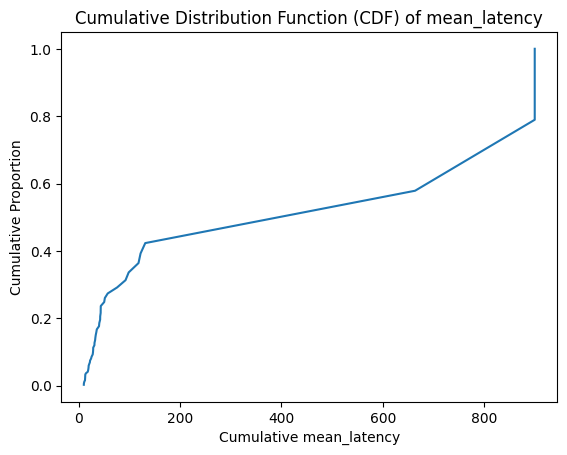

[ 10.17137233  10.2345262   10.38467944  10.8541009   11.27663149
  12.45018089  12.54806454  12.68623732  12.80590672  12.87975233
  12.99302078  13.16646905  14.51955359  17.88597347  18.668564
  19.16615667  19.53080558  19.71450985  20.78312873  22.0942122
  22.50278269  24.45489102  25.54437806  27.70271759  28.27061972
  28.60163423  28.70381829  31.04734461  31.28113351  32.42469913
  32.9641922   33.7243763   34.85120739  35.78461798  40.11967672
  40.7233588   42.36916703  42.49508716  43.39977637  43.48209011
  43.63899298  50.38271648  51.69570221  57.32369299  75.79776167
  92.46622699  98.71037127 118.05977156 122.13382722 131.40748611
 663.87051557 900.         900.        ]


In [165]:
import numpy as np
import matplotlib.pyplot as plt
def plot_cdf(df, col='mean_latency'):
    values = df[col]
    cumulative= np.linspace(0,1,len(values))
    sorted_data = np.sort(values)
    cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)
    plt.plot(sorted_data, cumulative_data)
    plt.xlabel("Cumulative "+col)
    plt.ylabel("Cumulative Proportion")
    plt.title("Cumulative Distribution Function (CDF) of "+col)
    plt.show()
    print(sorted_data)
plot_cdf(  Wikidata_slow_as_med)

# Completely Unseen Baseline wikidata

In [7]:
import importlib
import inductive_query.res_proc_helper as help
importlib.reload(help)
import inductive_query.result_processor as res_proc
importlib.reload(res_proc)
import inductive_query.utils as ih
importlib.reload(ih)
CompletelyUnseenQueryExtractor = ih.CompletelyUnseenQueryExtractor
ResultProcessor = res_proc.ResultProcessor
get_completely_unseen_r_processor = help.get_completely_unseen_r_processor
path = '/data/wikidata_0_1_10_v2_weight_loss'
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/nn/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
c = CompletelyUnseenQueryExtractor(path)
q_files = c.run()
get_completely_unseen_r_processor_base = help.get_completely_unseen_r_processor
wikidata_completely_base = get_completely_unseen_r_processor(path, pred_path, split_path, name_dict, "PlanRGCN Completely unseen", q_files,apply_cls_func=None, pred_col='nn_prediction')

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 99.44 & 0.56 & 0.00 \\
1s to 10s & 80.00 & 20.00 & 0.00 \\
$>$ 10s & 100.00 & 0.00 & 0.00 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 530 & 3 & 0 \\
1s to 10s & 8 & 2 & 0 \\
$>$ 10s & 6 & 0 & 0 \\
\bottomrule
\end{tabular}



In [11]:
print('SVM')
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/svm/test_pred.csv'
get_completely_unseen_r_processor_base = help.get_completely_unseen_r_processor
wikidata_completely_base = get_completely_unseen_r_processor(path, pred_path, split_path, name_dict, "PlanRGCN Completely unseen", q_files,apply_cls_func=None, pred_col='svm_prediction')

SVM
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 99.81 & 0.00 & 0.19 \\
1s to 10s & 90.00 & 0.00 & 10.00 \\
$>$ 10s & 100.00 & 0.00 & 0.00 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 532 & 0 & 1 \\
1s to 10s & 9 & 0 & 1 \\
$>$ 10s & 6 & 0 & 0 \\
\bottomrule
\end{tabular}



In [13]:
print('PlanRGCN')
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/planrgcn_binner_litplan/test_pred.csv'
get_completely_unseen_r_processor_base = help.get_completely_unseen_r_processor
wikidata_completely_base = get_completely_unseen_r_processor(path, pred_path, split_path, name_dict, "PlanRGCN Completely unseen", q_files,apply_cls_func=None, pred_col='planrgcn_prediction')

PlanRGCN
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 98.50 & 0.19 & 1.31 \\
1s to 10s & 40.00 & 50.00 & 10.00 \\
$>$ 10s & 16.67 & 0.00 & 83.33 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 525 & 1 & 7 \\
1s to 10s & 4 & 5 & 1 \\
$>$ 10s & 1 & 0 & 5 \\
\bottomrule
\end{tabular}



In [19]:
list(wikidata_completely_base.df[(wikidata_completely_base.df['planrgcn_prediction']==1)&(wikidata_completely_base.df['time_cls']==1)]['id'])

['lsqQuery-siGk4JU7cBr_mZ1cKlUcxeXEQ0oeYe5fBlNBwemLptI',
 'additionalWikidata8243',
 'additionalWikidata8231',
 'lsqQuery--jdgO9mXp2SMvLUtP3lu2PVY_L8V-9yfRGQ_P2n-Nsk',
 '220']

In [30]:
import json
import json5
import os
pred_freq_path = '/PlanRGCN/data/wikidata/predicate/pred_stat/batches_response_stats/freq'
pred_freq = {}
freq_pred = {}
for i in os.listdir(pred_freq_path):
    with open(os.path.join(pred_freq_path, i),'r') as f:
        try:
            data = json.load(f)
        except:
            try:
                data = json5.load(f)
            except:
                continue
        data = data['results']['bindings']
        for v in data:
            pred_freq[v['p1']['value']] = int(v['triples']['value'])
            try:
                freq_pred[int(v['triples']['value'])].append(v['p1']['value'])
            except:
                freq_pred[int(v['triples']['value'])] = [v['p1']['value']]
                
    

In [31]:
freq_pred

{39: ['http://www.wikidata.org/prop/direct/P8742',
  'http://www.wikidata.org/prop/direct/P2897',
  'http://www.wikidata.org/prop/direct/P9566',
  'http://www.wikidata.org/prop/direct/P6093',
  'http://www.wikidata.org/prop/direct/P4686',
  'http://www.wikidata.org/prop/direct/P1909',
  'http://www.wikidata.org/prop/direct/P8445',
  'http://www.wikidata.org/prop/direct/P5129',
  'http://www.wikidata.org/prop/direct/P2303',
  'http://www.wikidata.org/prop/direct/P5574',
  'http://www.wikidata.org/prop/direct/P2210',
  'http://www.wikidata.org/prop/direct/P9204',
  'http://www.wikidata.org/prop/direct/P5234',
  'http://www.wikidata.org/prop/direct/P2820',
  'http://www.wikidata.org/prop/direct/P5771',
  'http://www.wikidata.org/prop/direct/P7237',
  'http://www.wikidata.org/prop/direct/P3415',
  'http://www.wikidata.org/prop/direct/P8318',
  'http://www.wikidata.org/prop/direct/P916',
  'http://www.wikidata.org/prop/direct/P2165',
  'http://www.wikidata.org/prop/direct/P3708'],
 203: ['h

In [43]:
q2_pred = 'http://www.wikidata.org/prop/direct/P982'

p = q2_pred # for now
q4 = f'''
PREFIX wdt: <http://www.wikidata.org/prop/direct/> 
SELECT * WHERE {{ ?var1 wdt:P3230 ?var2 }}
'''
pred_freq[p]
print(q5)


SELECT * WHERE { 
?var1 ?var2 ?var3 . 
FILTER ( ( REGEX ( ?var3 , "caledfwlch", "i" ) ) ) . } 



Runtime statistics:
q1 = 929 msec
q2 = 542 msec
q4 = 339 msec
q5 = very slow (likely an hour or so).